<a href="https://colab.research.google.com/gist/sumitra288/783c64df349a839d43dfa7710a670a05/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")

df = df.iloc[:, :2]
df.columns = ["label", "message"]

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print(df.head())

X = df['message'].values
y = df['label'].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [ ]:
count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(X_train_raw).toarray()
X_test_count = count_vec.transform(X_test_raw).toarray()

tfidf_vec = TfidfVectorizer()
X_train_tfidf = tfidf_vec.fit_transform(X_train_raw).toarray()
X_test_tfidf = tfidf_vec.transform(X_test_raw).toarray()

In [ ]:
scaler = StandardScaler(with_mean=False)  # works for sparse matrices
X_train_count_scaled = scaler.fit_transform(X_train_count)
X_test_count_scaled = scaler.transform(X_test_count)

X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)


In [ ]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, reg_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.losses = []
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1/m) * np.dot(X.T, (y_pred - y)) + (self.reg_lambda/m) * self.weights
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = - (1/m) * np.sum(y*np.log(y_pred+1e-15) + (1-y)*np.log(1-y_pred+1e-15))
            loss += (self.reg_lambda/(2*m)) * np.sum(self.weights**2)
            self.losses.append(loss)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)


In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Logistic Regression (CountVectorizer + Scaling, No Regularization) ===
Accuracy : 0.9704035874439462
Precision: 0.9833333333333333
Recall   : 0.7919463087248322
F1 Score : 0.8773234200743495
Confusion Matrix:
 [[964   2]
 [ 31 118]]


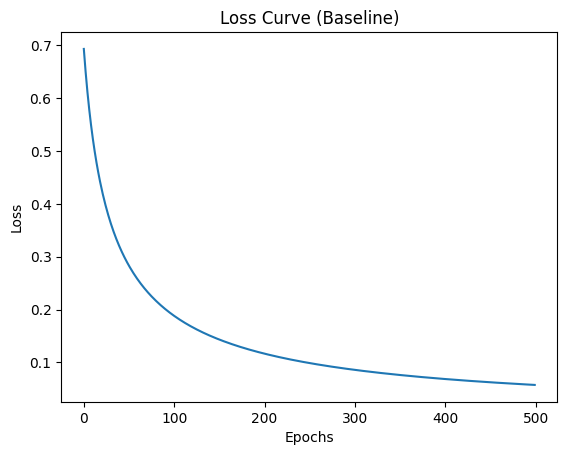

In [ ]:
print("=== Logistic Regression (CountVectorizer + Scaling, No Regularization) ===")
model = LogisticRegressionScratch(lr=0.01, epochs=500)
model.fit(X_train_count_scaled, y_train)
evaluate(model, X_test_count_scaled, y_test)

plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (Baseline)")
plt.show()



In [ ]:
print("\n=== CountVectorizer ===")
model_count = LogisticRegressionScratch(lr=0.01, epochs=500)
model_count.fit(X_train_count_scaled, y_train)
evaluate(model_count, X_test_count_scaled, y_test)

print("\n=== TfidfVectorizer ===")
model_tfidf = LogisticRegressionScratch(lr=0.01, epochs=500)
model_tfidf.fit(X_train_tfidf_scaled, y_train)
evaluate(model_tfidf, X_test_tfidf_scaled, y_test)



=== CountVectorizer ===
Accuracy : 0.9704035874439462
Precision: 0.9833333333333333
Recall   : 0.7919463087248322
F1 Score : 0.8773234200743495
Confusion Matrix:
 [[964   2]
 [ 31 118]]

=== TfidfVectorizer ===
Accuracy : 0.9730941704035875
Precision: 0.976
Recall   : 0.8187919463087249
F1 Score : 0.8905109489051095
Confusion Matrix:
 [[963   3]
 [ 27 122]]


In [ ]:
for reg in [0.01, 0.1, 1.0]:
    print(f"\n=== Logistic Regression with L2 Regularization (λ={reg}) ===")
    model_reg = LogisticRegressionScratch(lr=0.01, epochs=500, reg_lambda=reg)
    model_reg.fit(X_train_count_scaled, y_train)
    evaluate(model_reg, X_test_count_scaled, y_test)


=== Logistic Regression with L2 Regularization (λ=0.01) ===
Accuracy : 0.9704035874439462
Precision: 0.9833333333333333
Recall   : 0.7919463087248322
F1 Score : 0.8773234200743495
Confusion Matrix:
 [[964   2]
 [ 31 118]]

=== Logistic Regression with L2 Regularization (λ=0.1) ===
Accuracy : 0.9704035874439462
Precision: 0.9833333333333333
Recall   : 0.7919463087248322
F1 Score : 0.8773234200743495
Confusion Matrix:
 [[964   2]
 [ 31 118]]

=== Logistic Regression with L2 Regularization (λ=1.0) ===
Accuracy : 0.9704035874439462
Precision: 0.9833333333333333
Recall   : 0.7919463087248322
F1 Score : 0.8773234200743495
Confusion Matrix:
 [[964   2]
 [ 31 118]]
